In [1]:
import sklearn

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris= load_iris()

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df = df.fillna(0)

In [9]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [10]:
df['species'] = iris.target

In [11]:
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [14]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [15]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [16]:
df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [17]:
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
df.groupby('species').median()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [19]:
df.groupby('species').std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

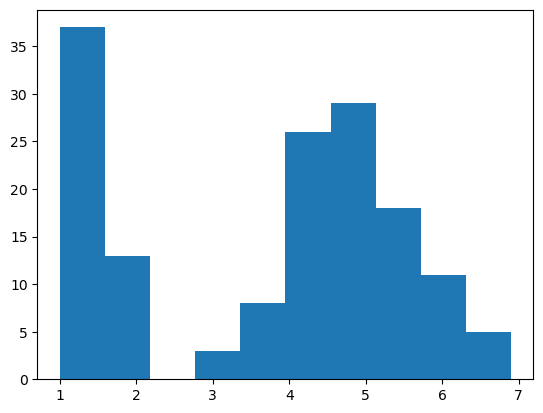

In [20]:
plt.hist(df['petal length (cm)'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

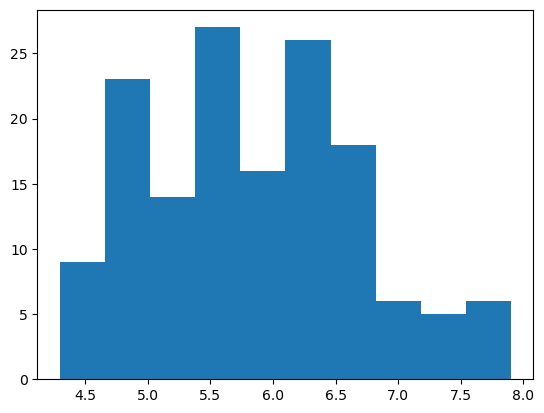

In [21]:
plt.hist(df['sepal length (cm)'])

Text(0, 0.5, 'Petal Length (cm)')

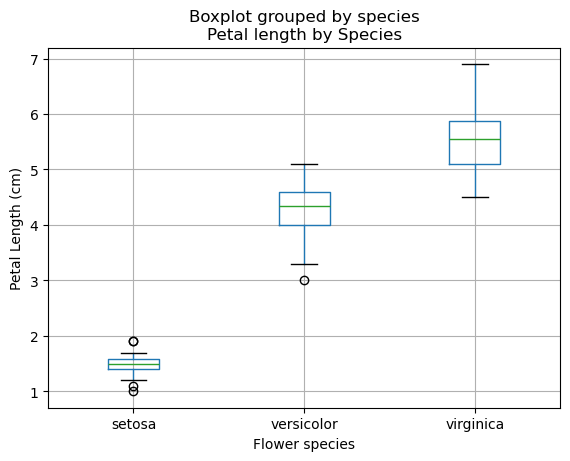

In [22]:
df.boxplot(column='petal length (cm)', by='species')
plt.title("Petal length by Species")
plt.xlabel('Flower species')
plt.ylabel("Petal Length (cm)")

Text(0, 0.5, 'Sepal width (cm)')

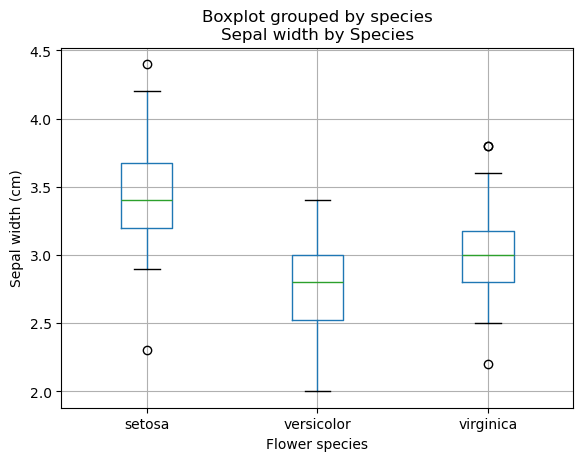

In [23]:
df.boxplot(column='sepal width (cm)', by='species')
plt.title("Sepal width by Species")
plt.xlabel('Flower species')
plt.ylabel("Sepal width (cm)")

In [24]:
setosa= df[df['species'] == 'setosa']
versicolor= df[df['species'] == 'versicolor']
virginica= df[df['species'] == 'virginica']

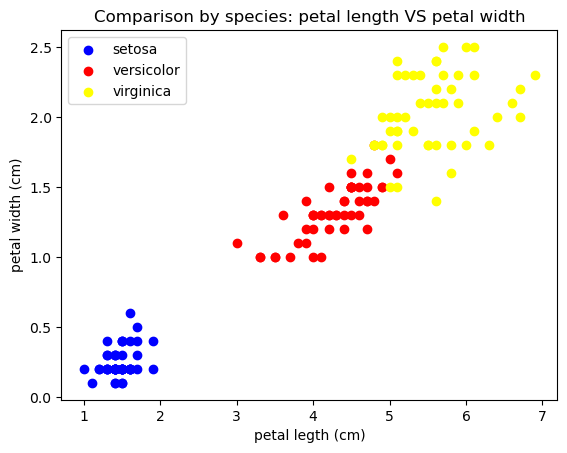

In [25]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'], color='blue', label='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'], color='red', label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'], color='yellow', label='virginica')
plt.title("Comparison by species: petal length VS petal width")
plt.xlabel('petal legth (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [26]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['species']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [30]:
from sklearn import neighbors, metrics

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 25, weights= 'uniform')

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [33]:
prediction = knn.predict(X_test)
print(prediction)

['setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa']


In [34]:
accuracy = metrics.accuracy_score(y_test, prediction)
print(accuracy)

0.9666666666666667


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
metrics= confusion_matrix(y_test, prediction)
print(metrics)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]


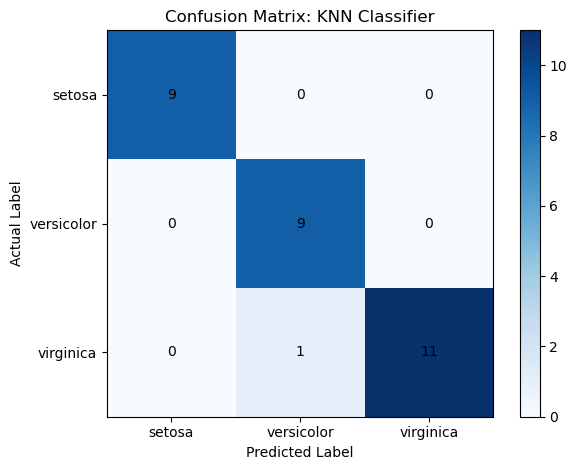

In [37]:
plt.imshow(metrics, cmap='Blues')
plt.colorbar()

flower_species= ['setosa','versicolor','virginica']
plt.xticks(np.arange(len(flower_species)), flower_species)
plt.yticks(np.arange(len(flower_species)), flower_species)

plt.title("Confusion Matrix: KNN Classifier")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

for i in range(len(flower_species)):
    for j in range(len(flower_species)):
        plt.text(j,i, metrics[i,j],ha='center', va='center', color='black')
plt.tight_layout()
plt.show()